In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the data

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print('Data imported succesfully')
df.head(5)

Data imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

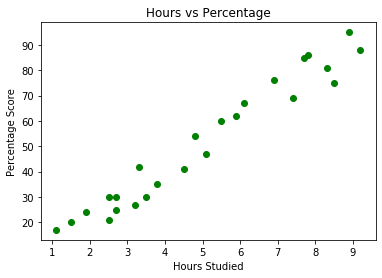

In [6]:
# Plotting the distribution of scores

plt.plot(df['Hours'], df['Scores'], linestyle='none', marker='o', color='g')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
# Preparing the data
X = df.iloc[:,:-1].values
X[0:10]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7]])

In [8]:
y = df.iloc[:,1].values
y[0:10]

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25], dtype=int64)

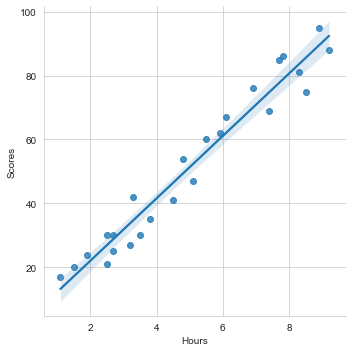

In [9]:
#plotting the regression line
sns.set_style('whitegrid') 
sns.lmplot(x ='Hours', y ='Scores', data = df)

In [10]:
#splitting the data
from sklearn.model_selection import train_test_split

#we split 80% of the data to the training set while 20% of the data to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
# printing the shapes of the new X objects 
print(X_train.shape) 
print(X_test.shape) 
  
# printing the shapes of the new y objects 
print(y_train.shape) 
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [13]:
#Applying model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print('Training is complete')

Training is complete


The linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. For getting the intercept and slope values execute following code

In [14]:
#To retrieve the intercept:
print(lr.intercept_)

#For retrieving the slope:
print(lr.coef_)

2.018160041434683
[9.91065648]


In [15]:
#Making predictions

#testing data in hours
print(X_test)

#predicting the scores
y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#comparing actual vs predicted

df_data = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
df_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


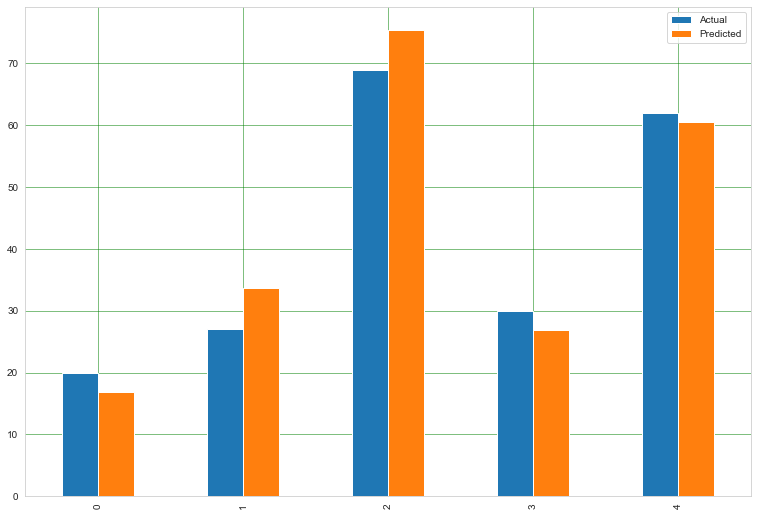

In [18]:
#Visual Comparison

df_data1 =df_data.head(5)
df_data1.plot(kind='bar',figsize=(13,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

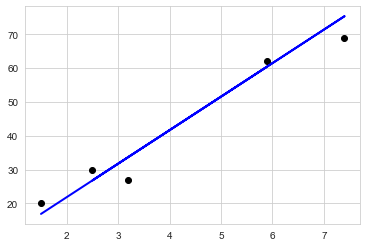

In [20]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


Score prediction when student scores for studing for 9.25 hours

In [22]:
hours = 9.25
prediction = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
